In [1]:
# https://jeremy9959.net/Blog/StanMixture/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pystan
import pandas as pd
from scipy.special import expit as logistic
import arviz as az

np.set_printoptions(precision=2, suppress = True)

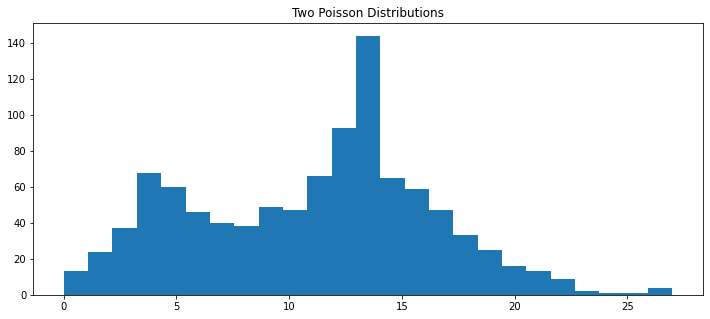

In [3]:
K = 2

A_lambda = 5
B_lambda = 14

A_num = 300
B_num = 700
total = A_num + B_num

A = np.random.poisson(A_lambda, A_num)
B = np.random.poisson(B_lambda, B_num)

X = np.concatenate([A, B])

plt.figure(figsize=(12, 5))
plt.title('Two Poisson Distributions')
plt.hist(X, bins = 25)
plt.show()

In [4]:
X.shape

(1000,)

In [5]:
stan_data = {
    'N': total,
    'K': K,
    'X': X,
}

In [6]:
stan_code = """
data{
    int N;
    int K;
    int X[N];
}

parameters{
    real<lower=0, upper=1> pi;
    real<lower=0> lambda[K];
}

model{
    pi ~ beta(5, 5);
    lambda ~ normal(8, 6);

    for (n in 1:N)
        target += log_mix(pi, poisson_lpmf(X[n] | lambda[1]), poisson_lpmf(X[n] | lambda[2]));
}

generated quantities {
}

"""

In [7]:
sm = pystan.StanModel(model_code= stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a5e6fec57ee39e82e3282ac5a67f1f5b NOW.


In [8]:
mcmc_result = sm.sampling(
    data=stan_data,
    chains=4,
    iter=2000,
    warmup=1000,
    thin=1
)

In [9]:
print(mcmc_result)

Inference for Stan model: anon_model_a5e6fec57ee39e82e3282ac5a67f1f5b.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
pi           0.4    0.12   0.17   0.27   0.29   0.31   0.51   0.72      2  10.36
lambda[1]   7.09     2.7   3.82   4.56   4.81   4.96   9.74  13.94      2  23.21
lambda[2]   11.5     2.7   3.82   4.65   8.91  13.64  13.78   14.0      2  24.05
lp__       -3014    0.03    1.2  -3017  -3015  -3014  -3013  -3013   1847    1.0

Samples were drawn using NUTS at Fri Oct  1 20:24:53 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


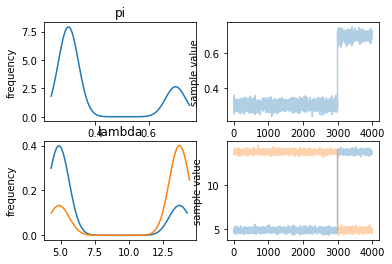

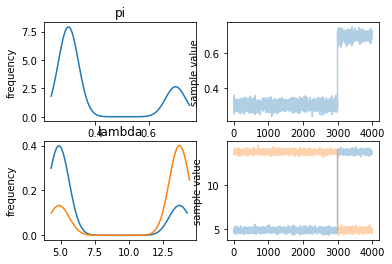

In [10]:
mcmc_result.plot()